# Import libraries

In [1]:
import segmentation_models as sm
import numpy as np
import json
import numpy as np
import os
import cv2

Segmentation Models: using `keras` framework.


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU
import tensorflow as tf

# Verify devices
print("Available devices:")
print(tf.config.list_physical_devices())

Available devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Train model

In [4]:
model = sm.Unet(
    backbone_name='resnet34',
    input_shape=(512, 512, 3),  
    classes=4,
    activation='softmax',
    encoder_weights='imagenet'
)

In [5]:

# Define the model
model = sm.Unet(
    backbone_name='resnet34',  # Pre-trained backbone
    input_shape=(512, 512, 3),  # Input shape of your images (height, width, channels)
    classes=2,  # Number of classes (background + 1 labels)
    activation='softmax',  # Activation function for the output layer
    encoder_weights='imagenet'
)

# Compile the model
model.compile(
    optimizer='adam',  # Optimizer
    loss='sparse_categorical_crossentropy',  # Loss function for integer-encoded labels
    metrics=['accuracy']  # Evaluation metric
)

# Print model summary
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 bn_data (BatchNormalization)   (None, 512, 512, 3)  9           ['data[0][0]']                   
                                                                                                  
 zero_padding2d_34 (ZeroPadding  (None, 518, 518, 3)  0          ['bn_data[0][0]']                
 2D)                                                                                              
                                                                                            

In [6]:
# Path to the directory containing .npy files
image_dir = 'C:/ML_Data/0_data_pretrain_train/image_preprocess'
label_dir = 'C:/ML_Data/0_data_pretrain_train/label_preprocess'

# List all .npy files in the directory
image_list = [f for f in os.listdir(image_dir) if f.endswith('.npy')]
label_list = [f for f in os.listdir(label_dir) if f.endswith('.npy')]

# Load all files and stack them into a single array
X_train = np.array([np.load(os.path.join(image_dir, f)) for f in image_list])
y_train = np.array([np.load(os.path.join(label_dir, f)) for f in label_list])

#normalize y_train data
y_train = (y_train / 255).astype(np.uint8)

In [7]:
# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=2,  
    epochs=10,  
    validation_split=0.2  # Use 20% of the data for validation
)

Epoch 1/10
342/342 [==============================] - 901s 3s/step - loss: 0.0464 - accuracy: 0.9840 - val_loss: 0.4473 - val_accuracy: 0.7151
Epoch 2/10
342/342 [==============================] - 888s 3s/step - loss: 0.0268 - accuracy: 0.9897 - val_loss: 0.8426 - val_accuracy: 0.9024
Epoch 3/10
342/342 [==============================] - 898s 3s/step - loss: 0.0183 - accuracy: 0.9927 - val_loss: 0.0370 - val_accuracy: 0.9884
Epoch 4/10
342/342 [==============================] - 883s 3s/step - loss: 0.0164 - accuracy: 0.9934 - val_loss: 0.0286 - val_accuracy: 0.9903
Epoch 5/10
342/342 [==============================] - 894s 3s/step - loss: 0.0172 - accuracy: 0.9931 - val_loss: 0.1675 - val_accuracy: 0.9593
Epoch 6/10
342/342 [==============================] - 892s 3s/step - loss: 0.0146 - accuracy: 0.9940 - val_loss: 0.0297 - val_accuracy: 0.9910
Epoch 7/10
342/342 [==============================] - 881s 3s/step - loss: 0.0136 - accuracy: 0.9944 - val_loss: 0.0311 - val_accuracy: 0.9918

In [8]:
model.save('C:/ML_Data/pretrain_model_01.h5')

In [9]:
model.save('C:/ML_Data/pretrain_model_01.keras')

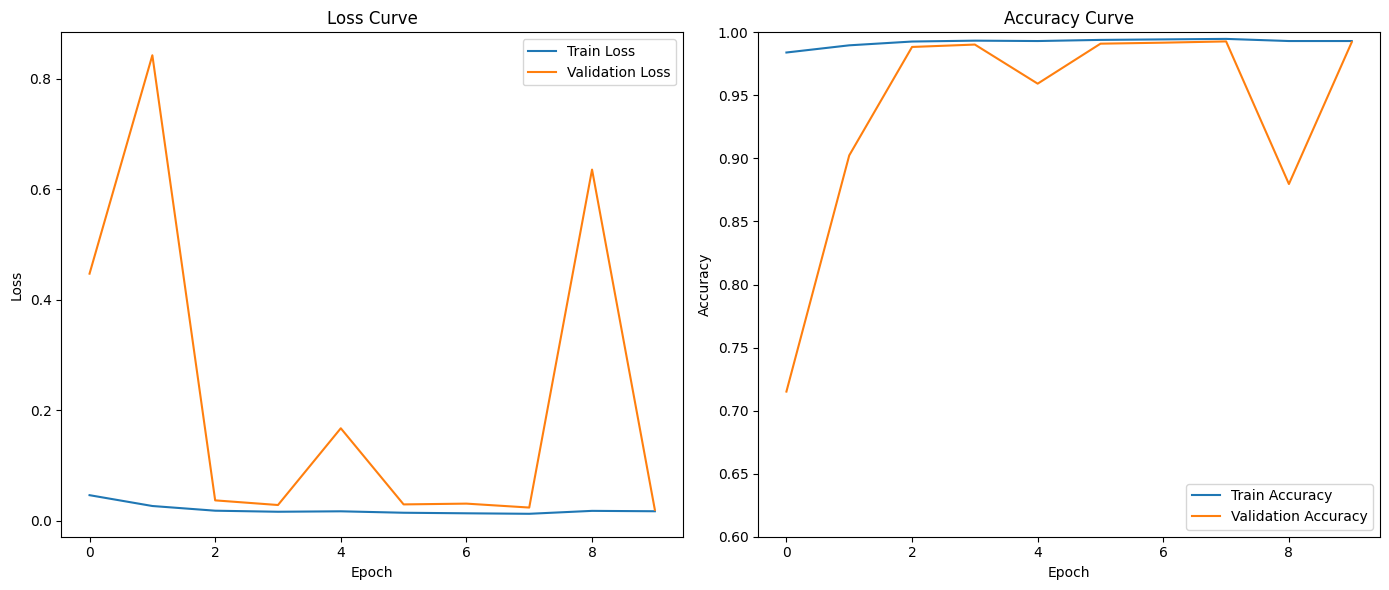

In [3]:
import matplotlib.pyplot as plt

# Extracted from your training logs
history = {
    'loss': [0.0464, 0.0268, 0.0183, 0.0164, 0.0172, 0.0146, 0.0136, 0.0127, 0.0180, 0.0173],
    'accuracy': [0.9840, 0.9897, 0.9927, 0.9934, 0.9931, 0.9940, 0.9944, 0.9948, 0.9931, 0.9931],
    'val_loss': [0.4473, 0.8426, 0.0370, 0.0286, 0.1675, 0.0297, 0.0311, 0.0240, 0.6357, 0.0199],
    'val_accuracy': [0.7151, 0.9024, 0.9884, 0.9903, 0.9593, 0.9910, 0.9918, 0.9928, 0.8797, 0.9922]
}

# Create the plot
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0.6, 1.0])  # Set consistent y-axis limits
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()